In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

In [2]:
from statiskit import (linalg,
                       core,
                       pgm)

In [3]:
import math
import os

# Simuler un graphe cordal $\Theta$ et les données data avec le fichier sampling

In [4]:
if not 'K' in os.environ:
    os.environ['K'] = str(10)
K = int(os.environ.get('K'))
simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
graph = pgm.read_gml(os.path.join('results', 'graph.gml'))
while not graph.is_chordal:
    simulation = !jupyter nbconvert --ExecutePreprocessor.timeout=3600 --to notebook --execute sampling.ipynb --output sampling.ipynb
    graph = pgm.read_gml(os.path.join('results', 'graph.gml'))

data = core.read_csv(os.path.join('results', 'data.csv'))
data


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,$-0.38$,$0.00$,$-0.56$,$0.88$,$0.24$,$0.09$,$2.12$,$-0.41$,$0.55$,$-1.58$
1,$0.83$,$0.72$,$-0.39$,$0.59$,$-0.04$,$-0.97$,$-0.57$,$1.00$,$0.20$,$-0.48$
2,$0.16$,$0.12$,$0.30$,$0.74$,$-0.51$,$-0.26$,$-0.77$,$0.52$,$-1.18$,$-0.22$
3,$-1.31$,$0.17$,$-0.82$,$0.75$,$-0.07$,$-0.66$,$0.89$,$-0.40$,$-1.65$,$-0.65$
4,$0.20$,$-0.24$,$-0.11$,$1.18$,$-0.71$,$-1.59$,$-0.43$,$1.16$,$-1.86$,$-0.12$
5,$-0.45$,$0.19$,$0.66$,$0.93$,$-0.75$,$-0.28$,$-1.14$,$-0.06$,$-0.78$,$1.25$
6,$-0.05$,$-0.59$,$-0.92$,$0.82$,$-0.33$,$0.04$,$1.92$,$1.52$,$-0.75$,$0.40$
7,$-0.38$,$-0.71$,$0.34$,$0.19$,$-1.19$,$2.36$,$0.47$,$-0.70$,$-1.10$,$-0.70$
8,$-0.37$,$0.15$,$1.60$,$-0.53$,$-0.07$,$0.39$,$-0.10$,$0.74$,$-2.18$,$0.76$
9,$0.40$,$0.10$,$-0.37$,$1.01$,$-0.97$,$-0.05$,$1.13$,$0.54$,$-1.26$,$-0.25$


# Estimation par   newton-raphson

In [5]:
algo = os.environ.get('ALGO', 'nr')

In [6]:
import time
prev = time.time()
nre = pgm.graphical_gaussian_estimation(algo=algo,
                                        data=data,
                                        graph=graph)
curr = time.time()

# Estimation par maximum vraisemblance MLE

In [7]:
import sys 
try:
    mle = pgm.graphical_gaussian_estimation(algo='ml',
                                        data=data,
                                        graph=graph)
except:
    mle = nre
    print ("theta non semi-def positive")
#finally:
#    sys.exit(0) 

# Calcul de $\widehat{\Theta}_{ML}$  et  $\widehat{\Theta}_{NR}$

In [8]:
theta_ML = mle.estimated.graph
theta_NR = nre.estimated.graph

<IPython.core.display.Javascript object>


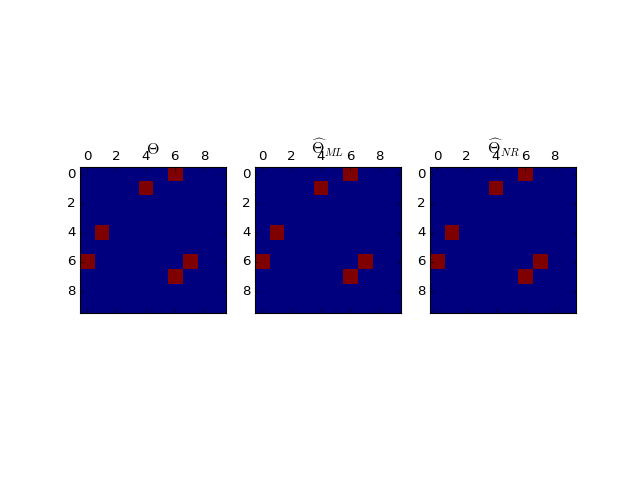

In [9]:
fig = pyplot.figure()
axes = graph.to_matrix().plot(axes = fig.add_subplot(131))
axes.set_title(r'$\Theta$')
axes = theta_ML.to_matrix().plot(axes = fig.add_subplot(132))
axes.set_title(r'$\widehat{\Theta}_{ML}$')
axes = theta_NR.to_matrix().plot(axes = fig.add_subplot(133))
axes.set_title(r'$\widehat{\Theta}_{NR}$')

# Comparaison des deux algorithmes.

In [10]:

LLH_ML = 2 * mle.estimated.loglikelihood(data)

LLH_NR = 2 * nre.estimated.loglikelihood(data)


(LLH_ML - LLH_NR )/LLH_ML

0.00558715103240695

In [11]:
LLH_ML, LLH_NR

(-201.03555817552413, -199.91234214911324)

In [12]:
import math
with open(os.path.join('results', 'estimation.csv'), 'a') as filehandler:
    filehandler.write(','.join([str(K), str(algo), str(curr-prev), str((LLH_ML - LLH_NR )/math.fabs(LLH_ML))]) + '\n')